In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']=6,3
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
import plotly.io as pio
pio.renderers.default="notebook"

In [3]:
data=pd.read_csv("Airbnb_Data.csv")

In [4]:
new_data=data[[ 
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       ]]

In [5]:
#rename columns
new_data.columns=[ 
       'Neighbourhood_Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country_Code', 'Room_Type',
       'Construction_Year', 'Price', 'Service_Fee', 'Minimum_Nights',
       'Number_Of_Reviews', 'Last_Review', 'Reviews_Per_Month',
       'Review_Rate_Number', 'Calculated_Host_Listings_Count',
       ]

In [6]:
new_data=new_data.dropna()

In [7]:
len(new_data)

84696

In [8]:
new_data["Neighbourhood_Group"].replace('brookln','Brooklyn', inplace=True)

In [9]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84696 entries, 0 to 102597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood_Group             84696 non-null  object 
 1   Neighbourhood                   84696 non-null  object 
 2   Lat                             84696 non-null  float64
 3   Long                            84696 non-null  float64
 4   Country                         84696 non-null  object 
 5   Country_Code                    84696 non-null  object 
 6   Room_Type                       84696 non-null  object 
 7   Construction_Year               84696 non-null  float64
 8   Price                           84696 non-null  object 
 9   Service_Fee                     84696 non-null  object 
 10  Minimum_Nights                  84696 non-null  float64
 11  Number_Of_Reviews               84696 non-null  float64
 12  Last_Review                    

In [10]:
new_data["Price"]=new_data["Price"].str.replace("$", '').str.replace(" ", '').str.replace(",", '').astype(float).astype(int)

In [11]:
new_data.head()

,Neighbourhood_Group,Neighbourhood,Lat,Long,Country,Country_Code,Room_Type,Construction_Year,Price,Service_Fee,Minimum_Nights,Number_Of_Reviews,Last_Review,Reviews_Per_Month,Review_Rate_Number,Calculated_Host_Listings_Count
0,Brooklyn,Kensington,40.64749,-73.97237,United States,US,Private room,2020.0,966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0
1,Manhattan,Midtown,40.75362,-73.98377,United States,US,Entire home/apt,2007.0,142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,Entire home/apt,2005.0,368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0
4,Manhattan,East Harlem,40.79851,-73.94399,United States,US,Entire home/apt,2009.0,204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0
5,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,Entire home/apt,2013.0,577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0


In [12]:
new_data["Service_Fee"]=new_data["Service_Fee"].str.replace("$", '').str.replace(" ", '').str.replace(",", '').astype(float).astype(int)

In [13]:
new_data=new_data[new_data.Room_Type!='Hotel room']

In [14]:
new_data.Room_Type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
#dic={'Neighbourhood_Group':"n"}
avr_price=new_data.groupby(['Neighbourhood_Group', 'Room_Type']).aggregate(avr_price=('Price', 'mean'),
                                                                          max_price=('Price', 'max'),
                                                                          min_price=('Price', 'min'))


                                                                         
#avr_price.style.set_properties(subset=['Neighbourhood_Group'], **{'width': '10000px'})  
avr_price

avr_price  max_price  min_price
Neighbourhood_Group Room_Type                                        
Bronx               Entire home/apt  630.460586       1200         50
                    Private room     631.851240       1198         54
                    Shared room      593.101124       1171         84
Brooklyn            Entire home/apt  625.955381       1200         50
                    Private room     629.425233       1200         50
                    Shared room      622.477759       1197         50
Manhattan           Entire home/apt  622.342879       1200         50
                    Private room     623.349472       1200         50
                    Shared room      636.900147       1199         50
Queens              Entire home/apt  624.686044       1200         50
                    Private room     634.442320       1200         50
                    Shared room      638.095070       1198         50
Staten Island       Entire home/apt  636.002387       1196         50
                    Private room     610.891089       1200         50
                    Shared room      695.250000        967        383

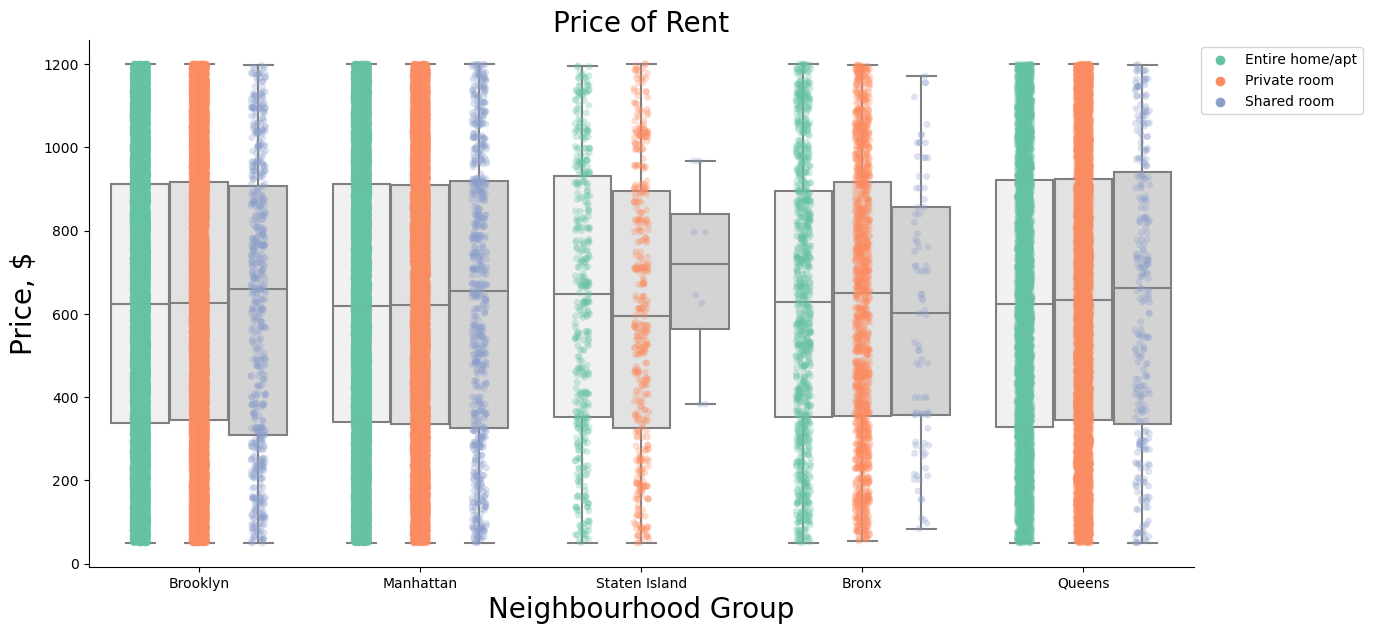

In [16]:

    
b=sns.catplot( data=new_data, x='Neighbourhood_Group', y='Price' , 
                 hue='Room_Type', kind="box",  height=6,
            aspect=2, legend = False,
               hue_order=['Entire home/apt',  'Private room', 'Shared room'], color="lightgrey",
                  showfliers = False)    



b=sns.stripplot( data=new_data, x='Neighbourhood_Group', y='Price' , 
                 hue='Room_Type',jitter=True,dodge=True, marker='o',
             palette="Set2" ,    alpha = 0.3, 
               hue_order=['Entire home/apt',  'Private room', 'Shared room'])  
      
              
# how to remove redundant legends in Python
# Let us first get legend information from the plot object
handles, labels =b.get_legend_handles_labels()
# specify just one legend
l = plt.legend( handles[3:6],labels[3:6], bbox_to_anchor=(1, 1.0), loc='upper left')
#plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left')
plt.title('Price of Rent', fontsize=20)    
plt.xlabel('Neighbourhood Group', fontsize=20)
plt.ylabel('Price, $', fontsize=20)
plt.show()  

In [17]:
import warnings 
warnings.filterwarnings('ignore')

In [18]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, clear_output
#import panel as pn

In [19]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [20]:
#!jupyter serverextension enable voila --sys-prefix



In [21]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!hupyter serverextension enable voila --sys-prefix

In [22]:
sns.set_style("darkgrid")

In [23]:
plt.rcParams["figure.figsize"] = [6, 2.5]
plt.rcParams["figure.autolayout"] = True

In [24]:
#@pn.depends(opt)
def plot_histogram (opt): 
    """plots histogram
    params:
    =======
    bins: int
        histogram bins
    hue: str
        categorical columns to color 
    kde: bool 
        wether to show kde plot 
    palette: str
        palette of histogram
    x_range_1: tuple(int,int)
        x range of the plot 
    returns:
        histogram
    """
    fig= plt.figure()
   
    #plt.figure(dpi = 120)
    plt.hist([new_data[(new_data.Neighbourhood_Group==opt) & (new_data.Room_Type=="Private room")].Price, 
         new_data[(new_data.Neighbourhood_Group==opt) & (new_data.Room_Type=="Shared room")].Price, 
         new_data[(new_data.Neighbourhood_Group==opt) & (new_data.Room_Type=="Entire home/apt")].Price],     
         stacked=True, bins=30, label=["Private room","Shared room", "Entire home/apt"])
    
    
    plt.legend(  bbox_to_anchor=(1.3, 1), loc='upper right', fontsize="10")
    plt.title(f"Price for {opt}", fontsize=10)    
    plt.xlabel('Price', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.close()
    return fig

In [25]:
w1=interact(plot_histogram,
       opt = widgets.Dropdown(
    
    options=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
   
            
            button_type='success'))



interactive(children=(Dropdown(description='opt', options=('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten…

In [26]:
#opt = widgets.Dropdown(
    
    #options=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
   
            
            #button_type='success')

In [27]:
#from ipywidgets import HBox, VBox

In [28]:
  # opts = widgets.Select(
    
    #options=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
   
     

In [26]:
#pn.extension()

In [27]:

#pn.Column(opt, pn.bind(plot_histogram, opt ))


In [30]:
#!pip freeze > requirements.txt

In [25]:
#conda install -c conda-forge jupyter;

In [26]:
#conda install notebook

In [27]:
#conda update -n base -c defaults conda